# Exploratory Data Analysis and Feature Engineering

## Dataset Overview
The dataset consists of $200,000$ fully amortizing fixed-rate Single-Family mortgages. Of these, $125,959$ have been paid off, $73,295$ are still active, and $746$ have defaulted. There are $32$ features, spread across a range of different categories, which we will potentially use to predict **loan_status**. We have categorised them as follows:

- **Personal Details:**
    - **fico** (Numeric): Borrower's credit score
    - **dti** (Numeric): Ratio value of borrower(s) monthly debt payments to total monthly income
    - **ppmt_penalty** (Categorical): Denotes whether borrowers has at any time been obligated to pay a penalty in the event of certain repayments of pricnipal
    - **cnt_borr** (Categorical): Whether one of multiple borrowers are obligated to pay the mortgage: One borrower(1), Multiple borrowers(2)
  
- **Loan Details:**
    - **dt_first_pi** (Numeric): First payment date of mortgage (YYYYMM)
    - **dt_matr** (Numeric): Final payment date of mortgage (YYYYMM)
    - **mi_pct** (Numeric): Percentag of loss coverage on the loan, should the Borrower default
    - **orig_upb** (Numeric)/(Categorical): Unpaid balance of mortgage to the nearest $1,000
    - **int_rt** (Numeric): Interest rate of loan
    - **channel** (Categorical): Indicates whether Broker or correspondent was involved in origination of mortgage loan: Retail(R), Broker(B), Correspondent(C), TPO Not Specified(TPO)
    -  **loan_purpose** (Categorical): Indicates type of loan: Chash-out refinance mortgage(C), No cash-out refinance mortgage(N), Refinance mortgage not specified(R), Purchase mortgage(P)
    - **orig_loan_term** (Numeric)/(Categorical): Number of scheduled monthly repayments on mortgage
    - **prod_type** (Categorical): Denotes whether mortgage is fixed rate or adjustable rate
    - **seller_name** (Categorical): Entity acting as seller of mortgages to Freddie Mac
    - **servicer_name** (Categorical): Entity acting as servicer of mortgages to Freddie Mac
    - **flag_sc** (Categorical): Indicates whether mortgages with origination dates after 10/1/2008, delived to Freddie Mac on or after 1/1/2009 exceed the conforming loan limits
    - **program_ind** (Categorical): Indicates whether loan is part of any programmes: Home Possible(H), HFA Advantage(F), Refi Possible(R) Not Available/Applicable(9)
    - **rr_ind** (Categorical): Indicates whether loan is part of Relief Refinance Program: Yes(Y), NaN(N)
    - **io_ind** (Categorical): Indicates whether loan only requires interest payments for a specific period
    - **mi_cancel_ind** (Categorical): Indicates whether mortgage insurance has been reported as cancelled after time of Freddie Macs purchase of the mortgage loan: Cancelled(Y), Not Cancelled(N), Not Applicable(7), Not Disclosed(9)
    - **loan_status** (Categorical): Indicates whether borrower(s) has defaulted on loan, paid off loan or if loan is still active
  
- **Property Details:**
    - **flag_fthb** (Categorical): Indicates whether Borrower(s) is a purchasing mortgaged property as a primary residence, having had no ownership interest in a residential property in the three years prior: Yes(Y), No(N), Not available/applicable(9)
    - **cd_msa** (Categorical): Metropolitan Statistical Area (MSA) or Metropolitan Division
    - **cnt_units** (Ordinal)/(Categorical) Denotes number of units in property: One(1), Two(2), Three(3), Four(4), Not available(99)
    - **occpy_sts** (Categorical): Indicates status of property: Owner occupied(P), Second home(S), Investment property(I), Not available (9)
    - **st** (Categorical): Indicates State to which property belongs
    - **prop_type** (Categorical): Denotes property type: Condominium(CO), Planned unit development(PU), Cooperative share(CP), Manufactured home(MH), Single-family home(SF)
    - **zipcode** (Categorical): Postal code for location of mortgaged property
    - **property_val** (Categorical): Indicates method used to obtain property appraisal, if any: ACE Loans(1), Full Appraisal(2), Other Appraisals(3), ACE+PDR(4), Not Available(9)


- **Unsure**
    - **cltv** (Numeric): Ratio value of all combined loans of Borrower(s) to value of property
    - **ltv** (Numeric): Ratio value of mortgage loan of Borrower(s) to value of prop
    - **id_loan** (Descriptor): Unique identifier assigned to each loan
    - **id_loan_rr** (Descriptor) Unique identifier for loans where Relief Refinance Indicator is set to Y


In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d['flag_sc'] = d['flag_sc'].fillna('N')
d['rr_ind'] = d['rr_ind'].fillna('N')
d.drop(columns=['id_loan_rr', 'id_loan'])
d = d[d['fico'] != 9999] # removed missing credit scores for now but perhaps we should reconsider
d = d[d['mi_pct'] != 999]
d = d[d['cltv'] != 999]
d = d[d['property_val'] != 9]

/tmp/ipykernel_334/1667651318.py:2: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("freddiemac.csv")


In [3]:
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,seller_name,servicer_name,flag_sc,id_loan_rr,program_ind,rr_ind,property_val,io_ind,mi_cancel_ind,loan_status
0,809,201705,N,204704,NaN,0,1,P,75,38,...,Other sellers,SPECIALIZED LOAN SERVICING LLC,N,NaN,9,N,2,N,7,prepaid
1,702,201703,N,203202,NaN,0,1,P,80,36,...,Other sellers,Other servicers,N,NaN,9,N,2,N,7,active
2,792,201703,N,204702,NaN,0,1,S,60,36,...,Other sellers,Other servicers,N,NaN,9,N,2,N,7,prepaid
3,776,201703,N,204702,NaN,0,1,S,80,18,...,Other sellers,Other servicers,N,NaN,9,N,2,N,7,prepaid
4,790,201703,N,204702,41620.0,0,1,I,75,42,...,Other sellers,"PNC BANK, NA",N,NaN,9,N,2,N,7,active


In [4]:
# Separate objective variable from feature variables
X = d.drop('loan_status', axis = 1)
y = d['loan_status']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [5]:
# Define Variable Types
numerical_vars = ['fico', 'dt_first_pi', 'dt_matr', 'mi_pct', 'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'orig_loan_term'] #orig_upb? orig_loan_term?    
categorical_vars = ['flag_fthb', 'cd_msa', 'cnt_units', 'occupy_sts', 'orig_upb', 'channel', 'ppmt_penalty', 'prod_type', 'st', 'prop_type', 'zipcode', 'loan_purpose', 'orig_loan_term', 'cnt_borr', 'seller_name', 'servicer_name', 'flag_sc', 'program_ind', 'rr_ind', 'property_val', 'io_ind', 'mi_cancel_ind', 'loan_status'] #cnt_units?, orig_upb? #orig_loan_term?             
ordinal_vars = ['cnt_units'] #cnt_units?

<Axes: xlabel='orig_loan_term', ylabel='Count'>

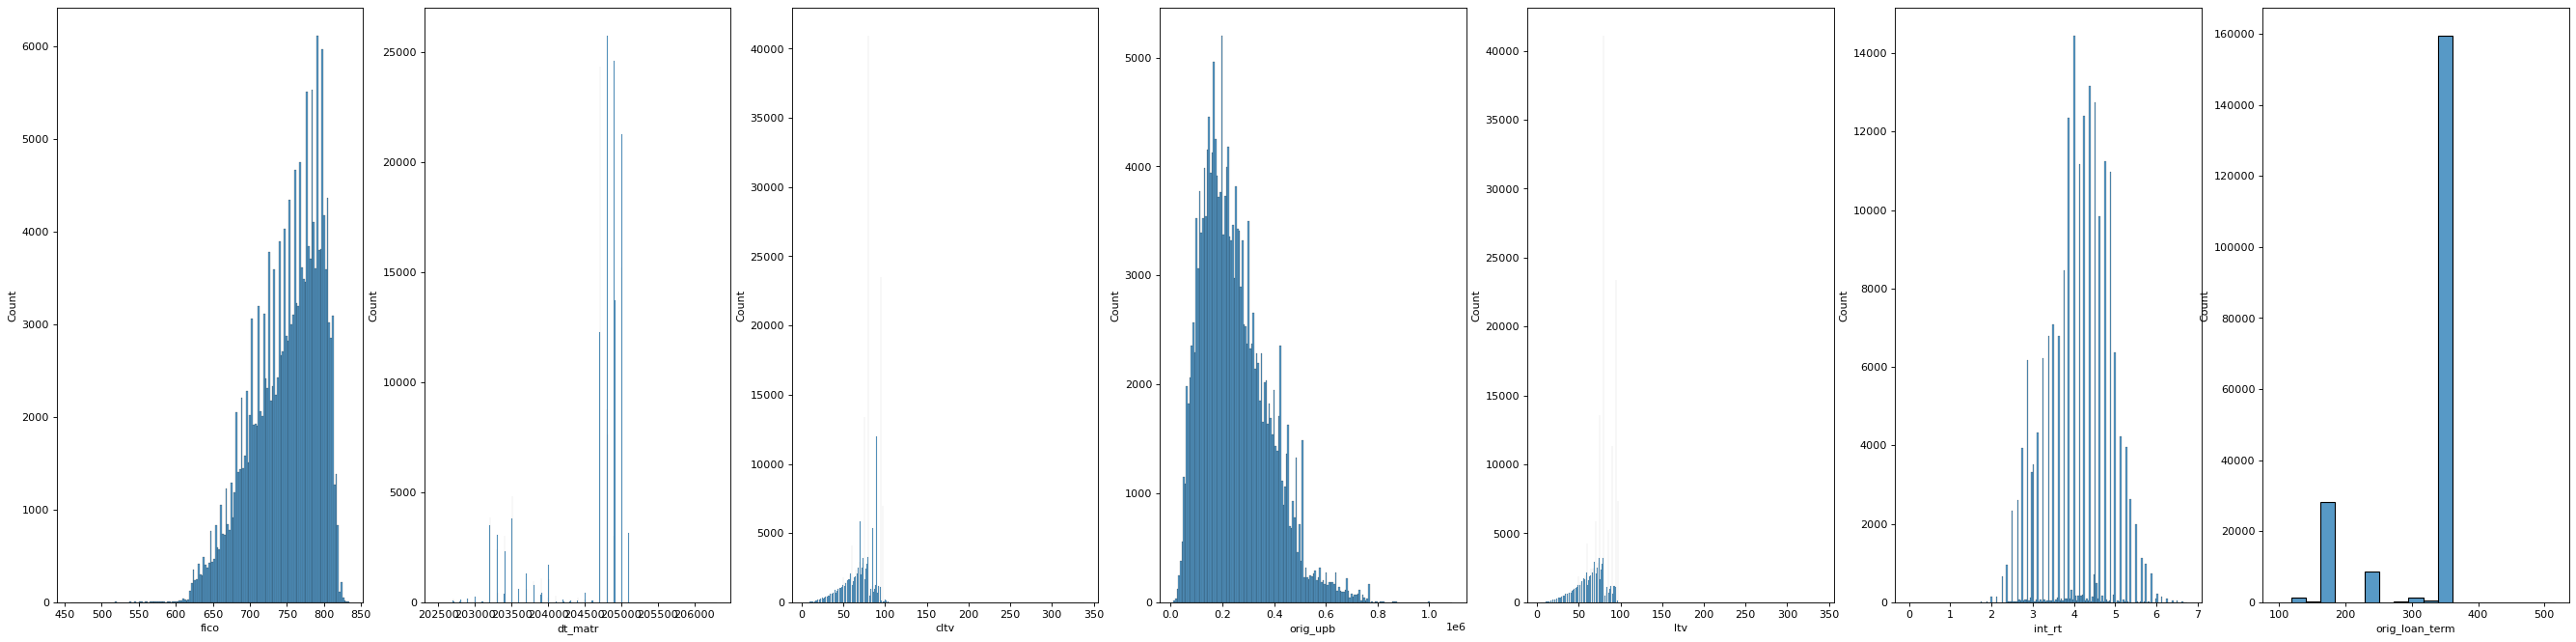

In [6]:
fig, axes = plt.subplots(1, 7, figsize=(42, 10))

sns.histplot(data=d, x="fico", ax=axes[0])
sns.histplot(data=d, x="dt_matr", ax=axes[1])
sns.histplot(data=d, x="cltv", ax=axes[2])
sns.histplot(data=d, x="orig_upb", ax=axes[3])
sns.histplot(data=d, x="ltv", ax=axes[4])
sns.histplot(data=d, x="int_rt", ax=axes[5])
sns.histplot(data=d, x="orig_loan_term", ax=axes[6])

<Axes: xlabel='dti', ylabel='Count'>

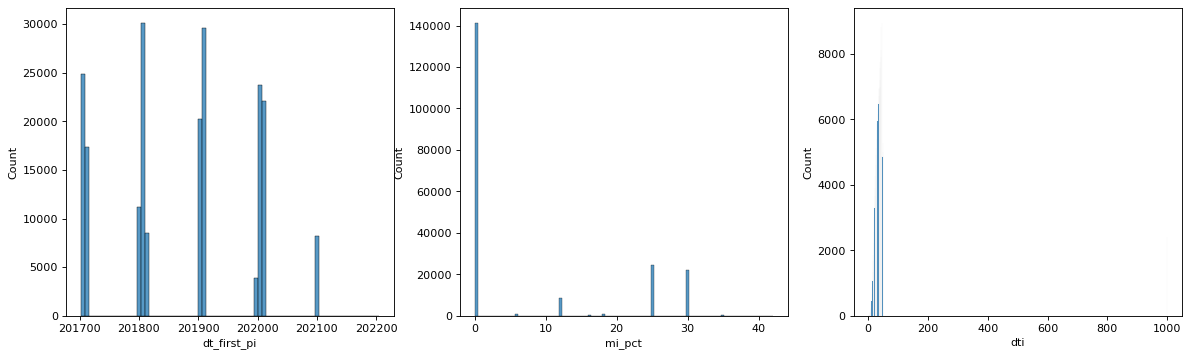

In [7]:
#numerical_vars = [ 'dt_first_pi', 'mi_pct',  'dti', ]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=d, x="dt_first_pi", ax=axes[0])
sns.histplot(data=d, x="mi_pct", ax=axes[1])
sns.histplot(data=d, x="dti", ax=axes[2])

**Conclusions from the Histograms:**
Treat dt_first_pi, mi_pct, dti as categorical variables, perhaps orig_loan_term too

In [8]:
d.corr(numeric_only = True)

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,property_val
fico,1.000000,0.105026,-0.004196,-0.000799,-0.049044,0.001073,-0.087541,-0.107184,0.094126,-0.083306,-0.245845,0.003565,-0.026087,-0.044538,-0.114132
dt_first_pi,0.105026,1.000000,0.161124,0.012229,-0.058268,-0.017783,-0.096654,-0.128379,0.158020,-0.091595,-0.514881,0.009402,-0.036674,0.011304,-0.363911
dt_matr,-0.004196,0.161124,1.000000,0.025943,0.234133,0.012507,0.284359,-0.098168,0.192366,0.285755,0.232956,0.051759,0.979505,-0.043894,-0.004984
cd_msa,-0.000799,0.012229,0.025943,1.000000,-0.023823,-0.000834,-0.038054,0.001571,0.076772,-0.037512,-0.007694,0.101621,0.023596,0.014507,-0.022456
mi_pct,-0.049044,-0.058268,0.234133,-0.023823,1.000000,-0.062415,0.656212,-0.047995,0.045184,0.664288,0.112458,-0.064145,0.248795,-0.044598,0.182381
cnt_units,0.001073,-0.017783,0.012507,-0.000834,-0.062415,1.000000,-0.059410,0.010568,0.057641,-0.057830,0.086470,-0.026686,0.016504,-0.015028,0.044593
cltv,-0.087541,-0.096654,0.284359,-0.038054,0.656212,-0.059410,1.000000,-0.031262,0.111353,0.990608,0.199702,-0.095832,0.307462,-0.047834,0.170470
dti,-0.107184,-0.128379,-0.098168,0.001571,-0.047995,0.010568,-0.031262,1.000000,-0.075146,-0.053136,0.054463,-0.012743,-0.073197,-0.022768,0.281737
orig_upb,0.094126,0.158020,0.192366,0.076772,0.045184,0.057641,0.111353,-0.075146,1.000000,0.102373,-0.195051,0.159808,0.161838,0.144321,-0.125733
ltv,-0.083306,-0.091595,0.285755,-0.037512,0.664288,-0.057830,0.990608,-0.053136,0.102373,1.000000,0.197965,-0.097080,0.307835,-0.050235,0.162374


<Axes: >

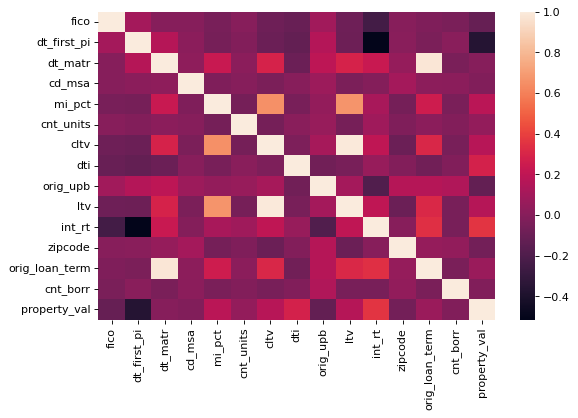

In [9]:
sns.heatmap(d.corr(numeric_only = True))

**Conclusions from the Correlation Heatmap:**
Only consider one of dt_matr and orig_loan_term as well as one of cltv and ltv
Perhaps can also only consider one of mi_pct and ltv and one of mi_pct and cltv also. 

NameError: name 'g' is not defined

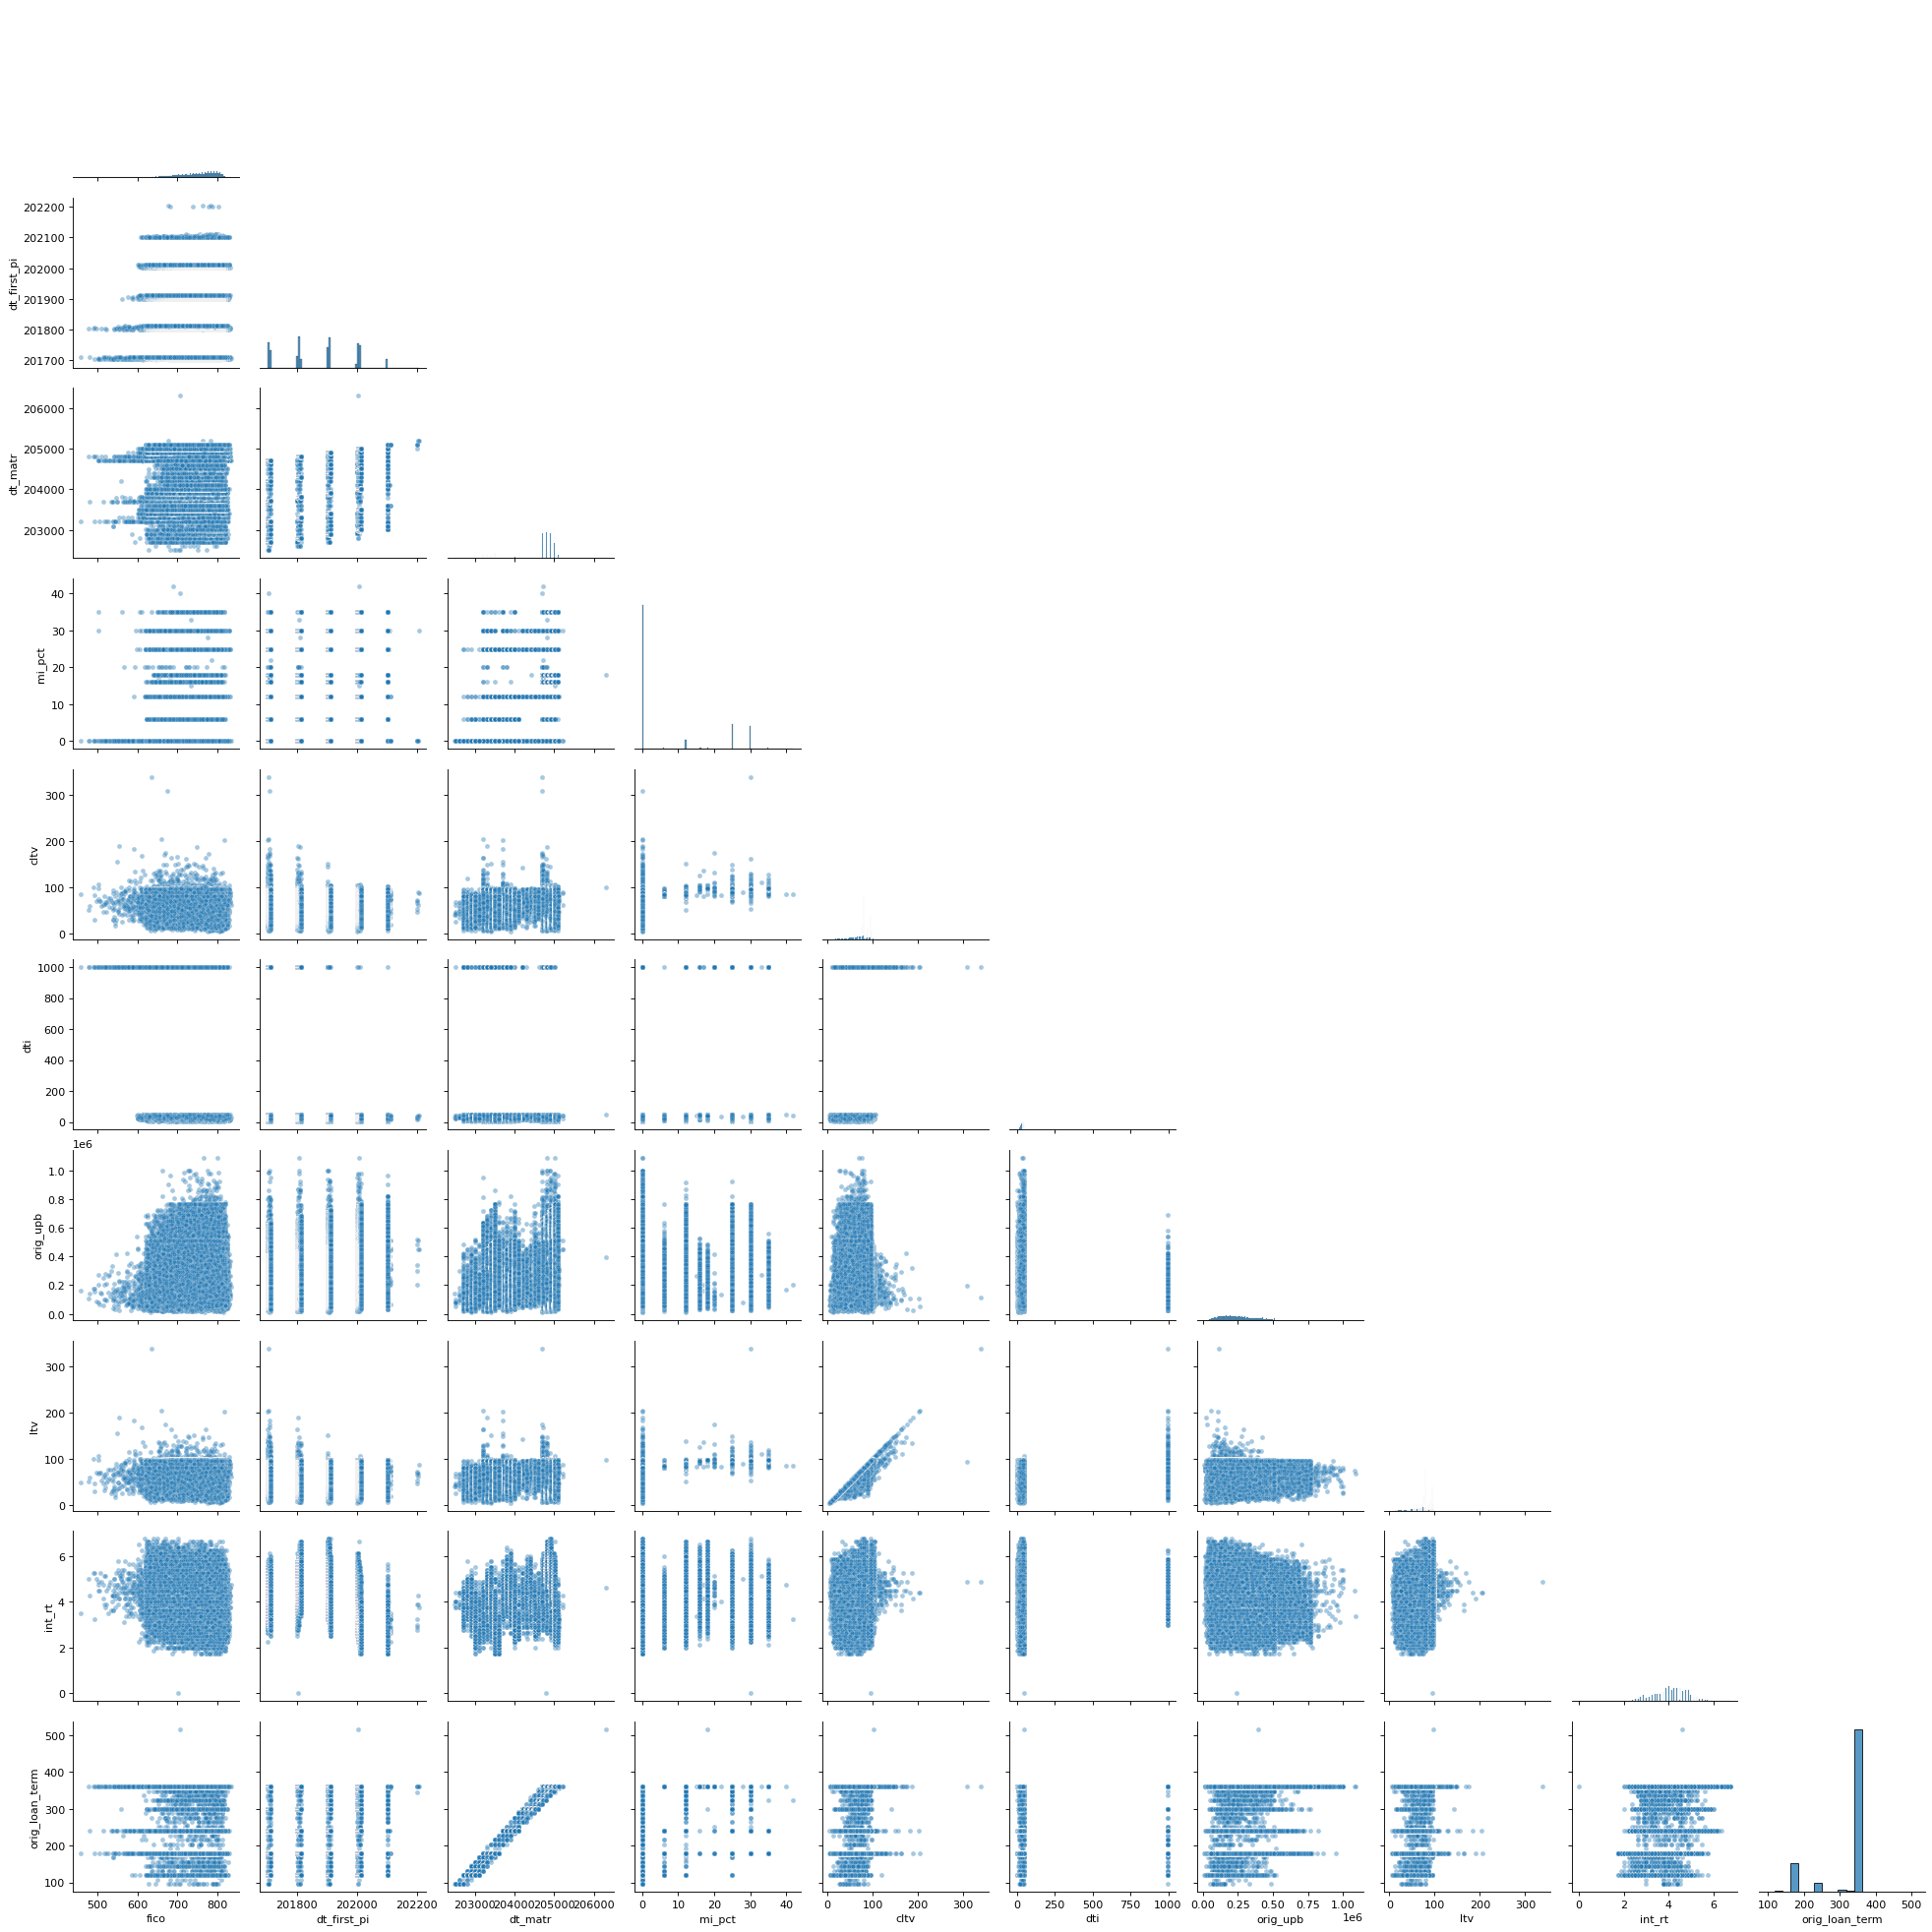

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot
sns.pairplot(d[numerical_vars], corner=True, plot_kws={'alpha': 0.4, 's': 20})

# Save the figure as a PDF
#g.savefig("pairplot.pdf", format="pdf", dpi=300)

# Show the plot
plt.show()


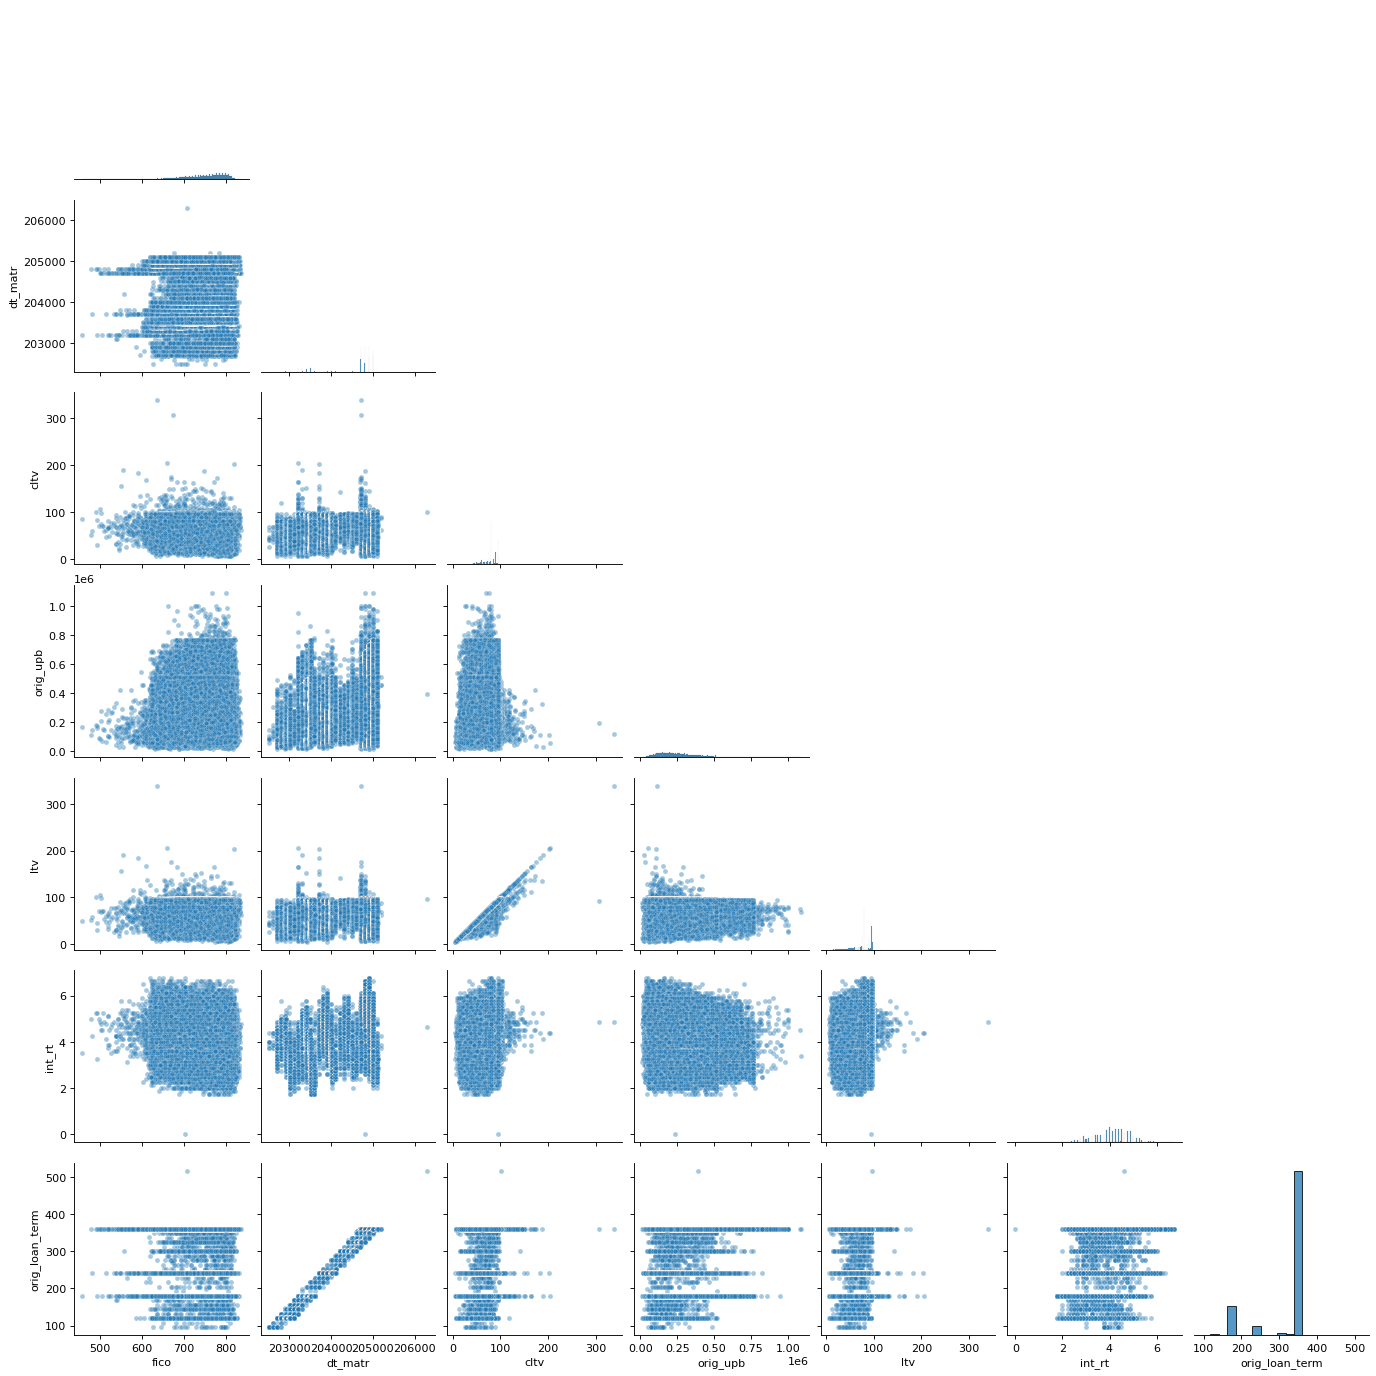

In [11]:
# Pairplot numerical columns
numerical_vars1 = ['fico', 'dt_matr', 'cltv', 'orig_upb', 'ltv', 'int_rt', 'orig_loan_term'] #orig_upb? orig_loan_term?    


sns.pairplot(d[numerical_vars1], corner=True,  plot_kws={'alpha': 0.4, 's': 20})
plt.show()

#dt_first_pi, mi_pct, dti, 

**Conclusions from the Pairplots:**

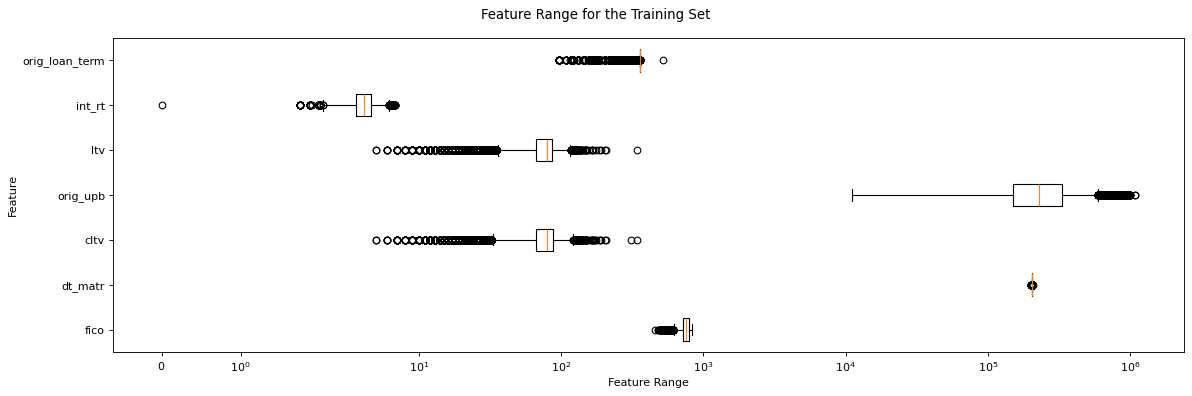

In [21]:
# Extract relevant numerical columns from DataFrame
numerical_data = X[numerical_vars1]

# Create the boxplot
fig, ax = plt.subplots(figsize=(15, 5))
plt.boxplot(numerical_data.values, vert=False)
plt.xscale("symlog")
plt.ylabel("Feature")
plt.xlabel("Feature Range")

# Set the feature names on the y-axis
ax.set_yticklabels(numerical_data.columns)

# Add a title and adjust layout
plt.suptitle("Feature Range for the Training Set")
plt.tight_layout()
plt.show()


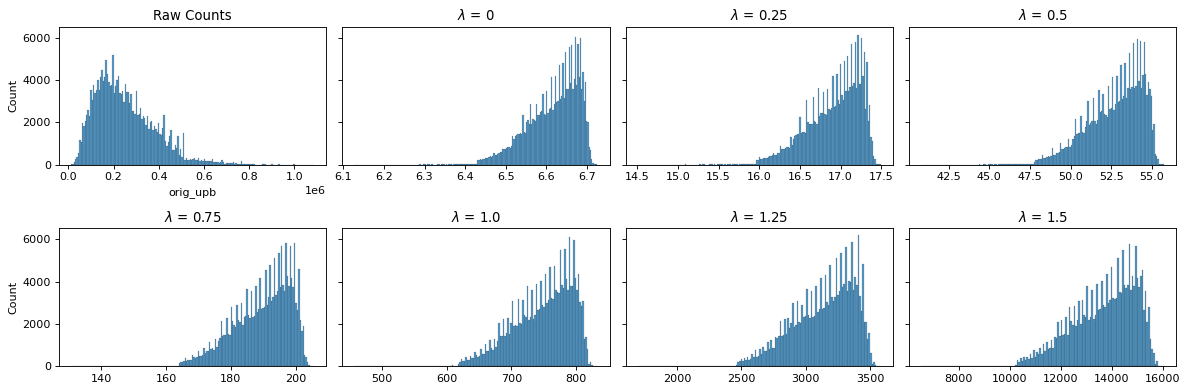

In [24]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#numerical_vars1 = ['fico', 'dt_matr', 'cltv', 'orig_upb', 'ltv', 'int_rt', 'orig_loan_term']

# Set up subplots
fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()

# Raw histogram
sns.histplot(data=d, x='orig_upb', ax=axes[0])
axes[0].set_title("Raw Counts")

# Box-Cox transformations for various λ values
for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    # Apply Box-Cox transformation to 'fico' column
    house_box_ = stats.boxcox(d['fico'].astype(float), lmbda=lmbda)
    
    # Plot the transformed data
    sns.histplot(house_box_, ax=axes[i + 1])
    axes[i + 1].set_title(f"$\lambda$ = {lmbda}")

# Adjust layout and show plot
plt.tight_layout()
plt.show()
